# <font color = "Green"> This notebook is a comprehensive program used for data preprocesssing and build models for Predicting EV Buying Intention

# <font color= "Indigo">Project Team:
<ol>
  <font color= "Indigo"><li>Gayathri Shanmugam</li>
  <li>Kayalvizhi Vellaichamy</li>
  <li>Nitya Malladi</li>
    <li>Saranya Anandan</li>
</ol>

### Context
The global auto manufacturing industry is undergoing rapid transformation by shifting focus from fuel-based vehicles to zero-emission vehicles (ZEVs). ZEVs are further categorized into battery electric vehicles and hydrogen fuel cell electric vehicles. In the United States, the federal government has mandated that at least 50% of the total cars sold should belong to the zero-emission category by the year 2030.
The scope of this project is to build a predictive model which classifies EV buyers in the United States based on their socio-demographic characteristics and their views on the current EV ecosystem. As per a recent survey, 53% of American vehicle users continue to prefer the traditional fuel-based vehicles over electric vehicles.This is a concerning issue for the government, auto companies and their dealers, and needs to be addressed by classifying an EV buyer from a non-buyer. Once the non-buyers are identified, focused strategies can be implemented to convert them into EV buyers

### Data attribute information


In [ ]:
conda install -c conda-forge lightgbm

### Import required packages.

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from mord import LogisticIT

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import neighbors 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import statsmodels.api as sm


from dmba import classificationSummary, gainsChart, liftChart
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import regressionSummary, exhaustive_search 
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import plotDecisionTree, classificationSummary, regressionSummary

from sklearn.neural_network import MLPClassifier, MLPRegressor 
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

/Users/nitya/opt/anaconda3/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Loading dataset

In [2]:
# Create data frame for EV data set.
EV_intention_df = pd.read_csv('AfterMerge_Dataset.csv')

# Display the first 10 records of EV_intention_df data frame.
print(EV_intention_df.head(10))


   bichoice  range  home_chg  work_chg  town  highway  gender          state  \
0         0      1         3         1     3        2       0  Massachusetts   
1         0      4         3         3     4        2       0  Massachusetts   
2         0      2         5         0     2        4       0  Massachusetts   
3         0      4         5         0     1        1       0  Massachusetts   
4         0      1         5         0     1        2       0  Massachusetts   
5         0      3        20        10     2        4       0  Massachusetts   
6         1      3         1         1     3        2       0  Massachusetts   
7         0      1         3         3     4        2       0  Massachusetts   
8         0      1         3         5     4        1       0  Massachusetts   
9         0      2         5        20     3        4       0  Massachusetts   

   Region  education  ...  home_parking  home_evse  work_parking  work_evse  \
0       1          4  ...             3 

# Data preprocessing

### Understanding the shape of the dataset

In [3]:
# Determine dimensions of dataframe. 
print('Dimensions of dataframe:',EV_intention_df.shape )
# It has 5898 rows and 27 columns.

Dimensions of dataframe: (5898, 27)


In [4]:
EV_intention_df.duplicated().sum()


0

In [5]:
EV_intention_df.isna().sum()

bichoice        0
range           0
home_chg        0
work_chg        0
town            0
highway         0
gender          0
state           0
Region          0
education       0
employment      0
hsincome        0
hsize           0
housit          0
residence       0
all_cars        0
ev_cars         0
home_parking    0
home_evse       0
work_parking    0
work_evse       0
buycar          0
zipcode         0
dmileage        0
long_dist       0
Age_category    0
RUCA            0
dtype: int64

### Check the data types of the columns for the dataset.

In [6]:
# Display column data types in the dataframe
print('Datatypes of all the columns in the dataset')
print(EV_intention_df.info())
EV_intention_df.describe().T

Datatypes of all the columns in the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   bichoice      5898 non-null   int64 
 1   range         5898 non-null   int64 
 2   home_chg      5898 non-null   int64 
 3   work_chg      5898 non-null   int64 
 4   town          5898 non-null   int64 
 5   highway       5898 non-null   int64 
 6   gender        5898 non-null   int64 
 7   state         5898 non-null   object
 8   Region        5898 non-null   int64 
 9   education     5898 non-null   int64 
 10  employment    5898 non-null   int64 
 11  hsincome      5898 non-null   int64 
 12  hsize         5898 non-null   int64 
 13  housit        5898 non-null   int64 
 14  residence     5898 non-null   int64 
 15  all_cars      5898 non-null   int64 
 16  ev_cars       5898 non-null   int64 
 17  home_parking  5898 non-null   int64 
 18  home

,count,mean,std,min,25%,50%,75%,max
bichoice,5898.0,0.550017,0.497534,0.0,0.0,1.0,1.0,1.0
range,5898.0,2.507460,1.112326,1.0,2.0,3.0,3.0,4.0
home_chg,5898.0,5.943371,6.602592,0.0,1.0,3.0,10.0,20.0
work_chg,5898.0,5.899627,6.574685,0.0,1.0,3.0,10.0,20.0
town,5898.0,2.504408,1.124472,1.0,1.0,3.0,4.0,4.0
highway,5898.0,2.502204,1.115089,1.0,2.0,2.0,3.0,4.0
gender,5898.0,0.503561,0.500030,0.0,0.0,1.0,1.0,1.0
Region,5898.0,2.899288,1.367156,1.0,2.0,3.0,4.0,5.0
education,5898.0,2.703967,0.839617,1.0,2.0,3.0,3.0,4.0
employment,5898.0,1.659207,1.291301,1.0,1.0,1.0,2.0,6.0


- There are no null values
- All columns are integer type except state which is of object datatype
- Some of the attributes need the conversion into their equivalent dummy values

In [36]:
# Display column data types in the dataframe before modification
print('Original Column data types')
print(EV_intention_df.dtypes)

Original Column data types
bichoice         int64
range            int64
home_chg         int64
work_chg         int64
town             int64
highway          int64
gender           int64
state           object
Region           int64
education        int64
employment       int64
hsincome         int64
hsize            int64
housit           int64
residence        int64
all_cars         int64
ev_cars          int64
home_parking     int64
home_evse        int64
work_parking     int64
work_evse        int64
buycar           int64
zipcode          int64
dmileage         int64
long_dist        int64
Age_category     int64
RUCA             int64
dtype: object


In [7]:
# Need to change all the variables with multiple classes to 'category'datatype 
EV_intention_df.gender = EV_intention_df.gender.astype('category')
EV_intention_df.state = EV_intention_df.state.astype('category')
EV_intention_df.employment = EV_intention_df.employment.astype('category')
EV_intention_df.hsize = EV_intention_df.hsize.astype('category')
EV_intention_df.housit = EV_intention_df.housit.astype('category')
EV_intention_df.residence = EV_intention_df.residence.astype('category')
#EV_intention_df.zipcode = EV_intention_df.zipcode.astype('category')
EV_intention_df.buycar = EV_intention_df.buycar.astype('category')
EV_intention_df.home_evse = EV_intention_df.home_evse.astype('category')
EV_intention_df.work_evse = EV_intention_df.work_evse.astype('category')
EV_intention_df.town = EV_intention_df.town.astype('category')
EV_intention_df.highway = EV_intention_df.highway.astype('category')
EV_intention_df.home_parking = EV_intention_df.home_parking.astype('category')
EV_intention_df.work_parking = EV_intention_df.work_parking.astype('category')
EV_intention_df.RUCA = EV_intention_df.RUCA.astype('category')
EV_intention_df.Region = EV_intention_df.Region.astype('category')
EV_intention_df.Age_category = EV_intention_df.Age_category.astype('category')
EV_intention_df.education = EV_intention_df.education.astype('category')
EV_intention_df.hsincome = EV_intention_df.hsincome.astype('category')
EV_intention_df.range = EV_intention_df.range.astype('category')
EV_intention_df.bichoice = EV_intention_df.bichoice.astype('category')

# Display category levels (attributes) and category type.
print(' ')
print('Category levels and changed variable type:')
print(EV_intention_df.gender.cat.categories)
print(EV_intention_df.gender.dtype)
print(EV_intention_df.state.cat.categories)
print(EV_intention_df.state.dtype)
print(EV_intention_df.employment.cat.categories)
print(EV_intention_df.employment.dtype)
print(EV_intention_df.hsize.cat.categories)
print(EV_intention_df.hsize.dtype)
print(EV_intention_df.housit.cat.categories)
print(EV_intention_df.housit.dtype)
print(EV_intention_df.residence.cat.categories)
print(EV_intention_df.residence.dtype)
print(EV_intention_df.bichoice.cat.categories)
print(EV_intention_df.bichoice.dtype)
# print(EV_intention_df.zipcode.cat.categories)
# print(EV_intention_df.zipcode.dtype)
print(EV_intention_df.buycar.cat.categories)
print(EV_intention_df.buycar.dtype)
print(EV_intention_df.home_evse.cat.categories)
print(EV_intention_df.home_evse.dtype)
print(EV_intention_df.work_evse.cat.categories)
print(EV_intention_df.work_evse.dtype)
print(EV_intention_df.town.cat.categories)
print(EV_intention_df.town.dtype)
print(EV_intention_df.highway.cat.categories)
print(EV_intention_df.highway.dtype)
print(EV_intention_df.home_parking.cat.categories)
print(EV_intention_df.home_parking.dtype)
print(EV_intention_df.work_parking.cat.categories)
print(EV_intention_df.work_parking.dtype)
print(EV_intention_df.RUCA.cat.categories)
print(EV_intention_df.RUCA.dtype)
print(EV_intention_df.Region.cat.categories)
print(EV_intention_df.Region.dtype)
print(EV_intention_df.Age_category.cat.categories)
print(EV_intention_df.Age_category.dtype)
print(EV_intention_df.education.cat.categories)
print(EV_intention_df.education.dtype)
print(EV_intention_df.hsincome.cat.categories)
print(EV_intention_df.hsincome.dtype)
print(EV_intention_df.range.cat.categories)
print(EV_intention_df.range.dtype)
print(EV_intention_df.bichoice.cat.categories)
print(EV_intention_df.bichoice.dtype)

 
Category levels and changed variable type:
Int64Index([0, 1], dtype='int64')
category
Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
       'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'],
      dtype='object')
category
Int64Index([1, 2, 3, 4, 5, 6], dtype='int64')
category
Int64Index([1, 2, 3, 4, 5], dtype='int64')
category
Int64Index([1, 2, 3, 4], dtype='int64')
category
Int64Index([1, 2, 3, 4, 5, 6, 8], dtype='int64')

In [8]:
ordinal_encoded_columns= ['state']

ordinal_encoder = OrdinalEncoder(categories='auto')
ordinal_encoded_data = ordinal_encoder.fit_transform(EV_intention_df[ordinal_encoded_columns])

#Convert it to df
ordinal_encoded_data_df = pd.DataFrame(ordinal_encoded_data, index=EV_intention_df.index,columns=['state'])
#ordinal_encoded_data_df.columns = ordinal_encoder.get_feature_names_out(input_features=EV_intention_df[ordinal_encoded_columns])

#Extract only the columns that didnt need to be encoded
data_other_cols = EV_intention_df.drop(columns=ordinal_encoded_columns)

#Concatenate the two dataframes : 
EV_intention_df = pd.concat([ordinal_encoded_data_df, data_other_cols], axis=1)
print(EV_intention_df)
EV_intention_df.shape



      state bichoice range  home_chg  work_chg town highway gender Region  \
0      20.0        0     1         3         1    3       2      0      1   
1      20.0        0     4         3         3    4       2      0      1   
2      20.0        0     2         5         0    2       4      0      1   
3      20.0        0     4         5         0    1       1      0      1   
4      20.0        0     1         5         0    1       2      0      1   
...     ...      ...   ...       ...       ...  ...     ...    ...    ...   
5893    1.0        0     2        10         5    2       2      0      5   
5894    1.0        1     3         1         3    4       3      0      5   
5895    1.0        0     1        20         2    2       4      0      5   
5896    1.0        0     2        20         5    4       2      0      5   
5897    1.0        0     1         2         1    3       1      0      5   

     education  ... home_parking home_evse work_parking work_evse buycar  \

(5898, 27)

In [9]:
# Display column data types in the dataframe after modification
print('Modified Column data types')
print(EV_intention_df.dtypes)

Modified Column data types
state            float64
bichoice        category
range           category
home_chg           int64
work_chg           int64
town            category
highway         category
gender          category
Region          category
education       category
employment      category
hsincome        category
hsize           category
housit          category
residence       category
all_cars           int64
ev_cars            int64
home_parking    category
home_evse       category
work_parking    category
work_evse       category
buycar          category
zipcode            int64
dmileage           int64
long_dist          int64
Age_category    category
RUCA            category
dtype: object


In [10]:
EV_intention_df.state = EV_intention_df.state.astype('category')

In [44]:
#print(EV_intention_df.dtypes)

state           category
bichoice        category
range           category
home_chg           int64
work_chg           int64
town            category
highway         category
gender          category
Region          category
education       category
employment      category
hsincome        category
hsize           category
housit          category
residence       category
all_cars           int64
ev_cars            int64
home_parking    category
home_evse       category
work_parking    category
work_evse       category
buycar          category
zipcode            int64
dmileage           int64
long_dist          int64
Age_category    category
RUCA            category
dtype: object


### Data summary

In [21]:
# Use describe() function to display column statistics for the entire data set. 
np.round(EV_intention_df.describe(), decimals=2).T

,count,mean,std,min,25%,50%,75%,max
home_chg,5898.0,5.94,6.60,0.0,1.0,3.0,10.0,20.0
work_chg,5898.0,5.90,6.57,0.0,1.0,3.0,10.0,20.0
all_cars,5898.0,1.58,0.72,1.0,1.0,1.0,2.0,4.0
ev_cars,5898.0,0.08,0.30,0.0,0.0,0.0,0.0,4.0
zipcode,5898.0,52330.80,29095.13,1247.0,29483.0,48073.0,78258.0,99703.0
dmileage,5898.0,24.75,20.35,0.0,10.0,20.0,30.0,100.0
long_dist,5898.0,1.49,1.32,0.0,0.0,1.0,2.0,4.0


### Observation


In [11]:
#Develop predictors X and output variable Y for the data set.
X = EV_intention_df.drop(columns=['bichoice','zipcode'])
y = EV_intention_df['bichoice']

# Develop training (60%) and validation(40% or 0.4) partitions for
# heart_disease_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)
print('Training : ', train_X.shape)
print('Validation : ', valid_X.shape)

Training :  (4128, 25)
Validation :  (1770, 25)


In [12]:
print('Predictors list')
print(X.columns)

Predictors list
Index(['state', 'range', 'home_chg', 'work_chg', 'town', 'highway', 'gender',
       'Region', 'education', 'employment', 'hsincome', 'hsize', 'housit',
       'residence', 'all_cars', 'ev_cars', 'home_parking', 'home_evse',
       'work_parking', 'work_evse', 'buycar', 'dmileage', 'long_dist',
       'Age_category', 'RUCA'],
      dtype='object')


In [13]:
scaler = StandardScaler()

In [14]:
# Note the use of an array of column names.
scaler.fit(train_X[['state','range', 'home_chg', 'work_chg', 'town', 'highway', 'gender', 'Region',
       'education', 'employment', 'hsincome', 'hsize', 'housit', 'residence',
       'all_cars', 'ev_cars', 'home_parking', 'home_evse', 'work_parking',
       'work_evse', 'buycar', 'dmileage', 'long_dist', 'Age_category', 'RUCA']])  


StandardScaler()

In [15]:
# Transform the full data set into standardized (normalized) data set. 
#train_X.reset_index(drop=True,inplace=True)
train_X = pd.concat([pd.DataFrame(scaler.transform(train_X[['state','range', 'home_chg', 'work_chg', 'town', 'highway', 'gender', 'Region',
       'education', 'employment', 'hsincome', 'hsize', 'housit', 'residence',
       'all_cars', 'ev_cars', 'home_parking', 'home_evse', 'work_parking',
       'work_evse', 'buycar', 'dmileage', 'long_dist', 'Age_category', 'RUCA']]), 
                                    columns=['zstate','zrange', 'zhome_chg', 'zwork_chg', 'ztown', 'zhighway', 'zgender', 'zRegion',
       'zeducation', 'zemployment', 'zhsincome', 'zhsize', 'zhousit', 'zresidence',
       'zall_cars', 'zev_cars', 'zhome_parking', 'zhome_evse', 'zwork_parking',
       'zwork_evse', 'zbuycar', 'zdmileage', 'zlong_dist', 'zAge_category', 'zRUCA'],index=train_X.index),
                       train_X ], axis=1)
print('Standardized (Normalized) Values of EV Intention Data Set')
print()
print(train_X)

Standardized (Normalized) Values of EV Intention Data Set

        zstate    zrange  zhome_chg  zwork_chg     ztown  zhighway   zgender  \
5495  0.789037  1.325118  -0.150337  -0.126720  0.445019  1.348281 -1.031504   
2146 -1.081373  1.325118   0.602443  -0.587059 -1.323064  1.348281  0.969458   
1893 -1.081373  1.325118  -0.602005   2.174977 -0.439022 -1.349152  0.969458   
4741 -1.497020  0.434079   0.602443  -0.433613 -1.323064 -0.450008 -1.031504   
1686 -1.081373 -0.456960   0.602443  -0.126720 -0.439022 -0.450008  0.969458   
...        ...       ...        ...        ...       ...       ...       ...   
905   1.412508 -1.347998  -0.602005   2.174977 -0.439022  1.348281 -1.031504   
5192 -1.358471  0.434079   0.602443  -0.126720  1.329060  1.348281  0.969458   
3980 -0.457903 -1.347998  -0.150337  -0.126720 -1.323064  0.449137 -1.031504   
235   1.343233 -0.456960   2.108003  -0.126720  1.329060 -0.450008  0.969458   
5157 -1.358471  0.434079  -0.451449  -0.893952 -0.439022 -1.3

In [16]:
# Transform the full data set into standardized (normalized) data set. 
#valid_X.reset_index(drop=True,inplace=True)
valid_X = pd.concat([pd.DataFrame(scaler.transform(valid_X[['state','range', 'home_chg', 'work_chg', 'town', 'highway', 'gender', 'Region',
       'education', 'employment', 'hsincome', 'hsize', 'housit', 'residence',
       'all_cars', 'ev_cars', 'home_parking', 'home_evse', 'work_parking',
       'work_evse', 'buycar', 'dmileage', 'long_dist', 'Age_category', 'RUCA']]), 
                                    columns=['zstate','zrange', 'zhome_chg', 'zwork_chg', 'ztown', 'zhighway', 'zgender', 'zRegion',
       'zeducation', 'zemployment', 'zhsincome', 'zhsize', 'zhousit', 'zresidence',
       'zall_cars', 'zev_cars', 'zhome_parking', 'zhome_evse', 'zwork_parking',
       'zwork_evse', 'zbuycar', 'zdmileage', 'zlong_dist', 'zAge_category', 'zRUCA'],index=valid_X.index),
                       valid_X ], axis=1)
print('Standardized (Normalized) Values of EV Intention Data Set')
print()
print(valid_X)

Standardized (Normalized) Values of EV Intention Data Set

        zstate    zrange  zhome_chg  zwork_chg     ztown  zhighway   zgender  \
573   0.858312 -0.456960  -0.903117  -0.433613 -0.439022 -1.349152 -1.031504   
3219  1.620331  0.434079   2.108003  -0.740506 -0.439022  0.449137 -1.031504   
4436  1.204684 -1.347998   2.108003  -0.587059  0.445019 -0.450008  0.969458   
3887  0.165567  0.434079   0.602443   2.174977 -0.439022 -0.450008 -1.031504   
3656  0.027018  1.325118  -0.150337   0.640513  0.445019 -0.450008 -1.031504   
...        ...       ...        ...        ...       ...       ...       ...   
3321 -0.111531 -0.456960  -0.602005  -0.126720  1.329060 -1.349152 -1.031504   
2105 -1.081373 -0.456960  -0.451449  -0.740506 -0.439022  1.348281  0.969458   
710   0.858312  1.325118  -0.602005   2.174977 -0.439022 -1.349152 -1.031504   
4302  1.204684  1.325118  -0.602005  -0.126720  0.445019 -1.349152  0.969458   
3201  1.620331  0.434079  -0.602005   0.640513 -0.439022 -0.4

In [17]:
train_X_s = train_X.drop(columns= ['state','range', 'home_chg', 'work_chg', 'town', 'highway', 'gender', 'Region',
       'education', 'employment', 'hsincome', 'hsize', 'housit', 'residence',
       'all_cars', 'ev_cars', 'home_parking', 'home_evse', 'work_parking',
       'work_evse', 'buycar', 'dmileage', 'long_dist', 'Age_category', 'RUCA'])
print(train_X_s)

valid_X_s = valid_X.drop(columns= ['state','range', 'home_chg', 'work_chg', 'town', 'highway', 'gender', 'Region',
       'education', 'employment', 'hsincome', 'hsize', 'housit', 'residence',
       'all_cars', 'ev_cars', 'home_parking', 'home_evse', 'work_parking',
       'work_evse', 'buycar', 'dmileage', 'long_dist', 'Age_category', 'RUCA'])
print(valid_X_s)



        zstate    zrange  zhome_chg  zwork_chg     ztown  zhighway   zgender  \
5495  0.789037  1.325118  -0.150337  -0.126720  0.445019  1.348281 -1.031504   
2146 -1.081373  1.325118   0.602443  -0.587059 -1.323064  1.348281  0.969458   
1893 -1.081373  1.325118  -0.602005   2.174977 -0.439022 -1.349152  0.969458   
4741 -1.497020  0.434079   0.602443  -0.433613 -1.323064 -0.450008 -1.031504   
1686 -1.081373 -0.456960   0.602443  -0.126720 -0.439022 -0.450008  0.969458   
...        ...       ...        ...        ...       ...       ...       ...   
905   1.412508 -1.347998  -0.602005   2.174977 -0.439022  1.348281 -1.031504   
5192 -1.358471  0.434079   0.602443  -0.126720  1.329060  1.348281  0.969458   
3980 -0.457903 -1.347998  -0.150337  -0.126720 -1.323064  0.449137 -1.031504   
235   1.343233 -0.456960   2.108003  -0.126720  1.329060 -0.450008  0.969458   
5157 -1.358471  0.434079  -0.451449  -0.893952 -0.439022 -1.349152  0.969458   

       zRegion  zeducation  zemployment

In [18]:
poly = PolynomialFeatures(degree=3)
poly.fit(train_X_s)
train_X_p = poly.transform(train_X_s)
valid_X_p = poly.transform(valid_X_s)
#X = poly.transform(X)

In [19]:
train_X_p.shape
#valid_X_p.shape

(4128, 3276)

# PCA

In [74]:
# pca = PCA()

In [75]:
# pca.fit(train_X_s)

In [76]:
# print(pca.explained_variance_ratio_)

In [77]:
# np.sum(pca.explained_variance_ratio_[0:200])

In [78]:
# np.sum(pca.explained_variance_ratio_[0:250])

In [79]:
# np.sum(pca.explained_variance_ratio_[0:150])

In [80]:
# np.sum(pca.explained_variance_ratio_[0:100])

In [81]:
# np.sum(pca.explained_variance_ratio_[0:75])

In [82]:
# np.sum(pca.explained_variance_ratio_[0:50])

In [83]:
# pca200=PCA(n_components=24)
# pca200.fit(train_X_s)
# train_X_pca200 = pd.DataFrame(pca200.transform(train_X_s))
# valid_X_pca200 = pd.DataFrame(pca200.transform(valid_X_s))
# #train_X_pca200.to_csv('train_X_pca200.csv', index_label='index')
# #valid_X_pca200.to_csv('valid_X_pca200.csv', index_label='index')

In [84]:
# train_X_pca200

In [85]:
# train_X_pca200.head()

In [86]:
# valid_X_pca200.head()

# BUILDING THE DATA MINING METHODS:

## logistic regression 

# xgboost

In [20]:
xgbc = XGBClassifier(random_state=1,
                n_estimators=500,                
                learning_rate=0.05,      
                subsample=0.7,booster='gbtree')
#print(xgbc)
#XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
#       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
#       n_estimators=100, n_jobs=1, nthread=None,
#       objective='multi:softprob', random_state=0, reg_alpha=0,
#      reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
#      subsample=1, verbosity=1)
xgbc.fit(train_X_p, train_y)

[20:38:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, xgbc.predict_proba(valid_X_p)[:,1])

#print AUC score
print(auc)

0.8183292854748452


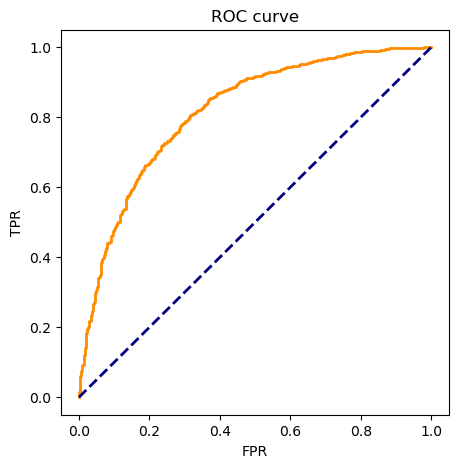

In [22]:
roc_auc_score(valid_y, xgbc.predict_proba(valid_X_p)[:,1])

fpr, tpr, _ = roc_curve(valid_y, xgbc.predict_proba(valid_X_p)[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [24]:
# Confusion matrices for XGBoosted Tree classification. 

# Identify  and show confusion matrix for training partition. 
print('Training Partition for XGBoosted Tree')
classificationSummary(train_y, xgbc.predict(train_X_p))

# Identify  and show confusion matrix for validation partition. 
print()
print('Validation Partition for XGBoosted Tree')
classificationSummary(valid_y, xgbc.predict(valid_X_p))
print(classification_report(valid_y, xgbc.predict(valid_X_p)))

Training Partition for XGBoosted Tree
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 1837    0
     1    0 2291

Validation Partition for XGBoosted Tree
Confusion Matrix (Accuracy 0.7458)

       Prediction
Actual   0   1
     0 541 276
     1 174 779
              precision    recall  f1-score   support

           0       0.76      0.66      0.71       817
           1       0.74      0.82      0.78       953

    accuracy                           0.75      1770
   macro avg       0.75      0.74      0.74      1770
weighted avg       0.75      0.75      0.74      1770



<AxesSubplot: >

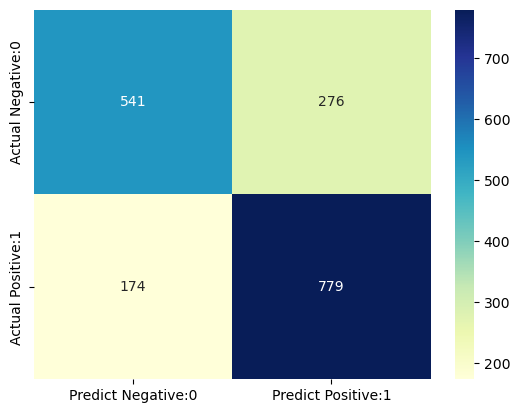

In [25]:
cm = confusion_matrix(valid_y, xgbc.predict(valid_X_p))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [26]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.metrics import cohen_kappa_score

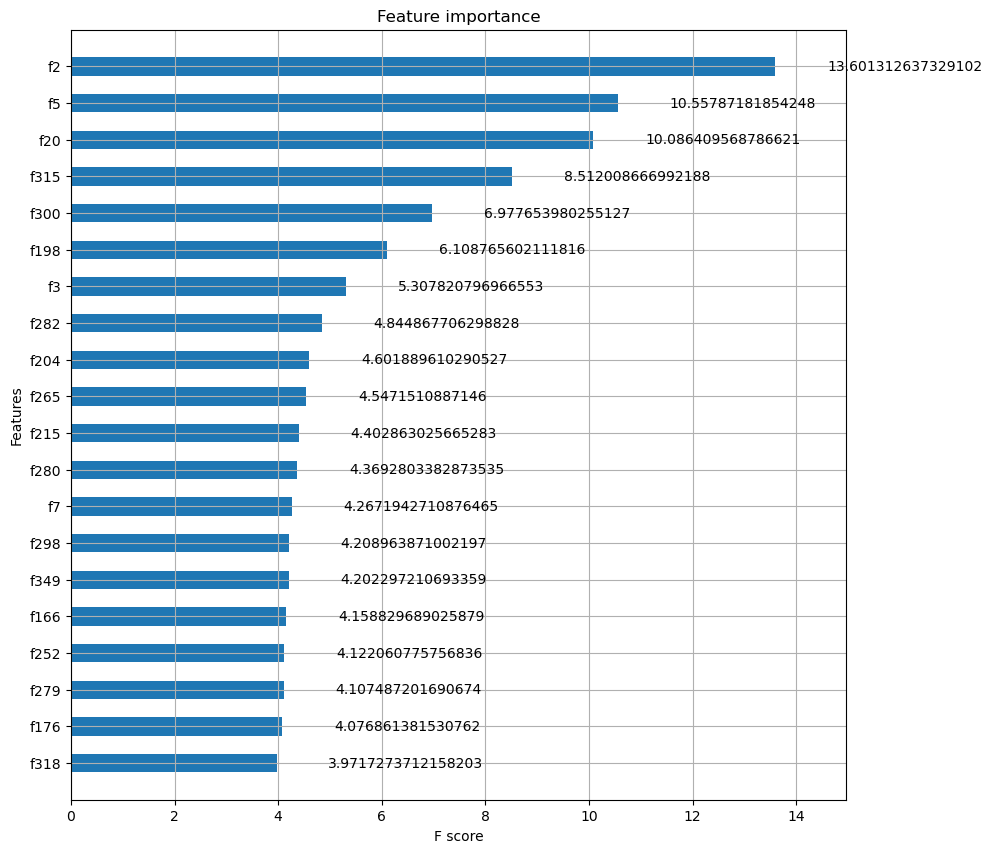

In [63]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgbc, max_num_features=20, height=0.5, ax=ax,importance_type='gain')
plt.show()

In [29]:
#threshold = np.sort(xgbc.feature_importances_)[100:]

In [30]:
#threshold

array([0.00245553, 0.00247324, 0.00247813, 0.00248539, 0.00249689,
       0.00249718, 0.00250014, 0.00250515, 0.00250531, 0.00252017,
       0.0025395 , 0.00254166, 0.00255167, 0.00256702, 0.00257504,
       0.00258393, 0.002584  , 0.00258446, 0.00258894, 0.00260135,
       0.00262779, 0.00263257, 0.00263324, 0.00263545, 0.00263768,
       0.00264339, 0.00265209, 0.00267057, 0.00267199, 0.00267296,
       0.00267613, 0.00267786, 0.00267831, 0.00267933, 0.00268417,
       0.0027044 , 0.00270998, 0.00271691, 0.0027258 , 0.00272585,
       0.00273631, 0.0027461 , 0.00275   , 0.00275357, 0.00275629,
       0.0027566 , 0.00275886, 0.00277462, 0.00277549, 0.00278046,
       0.00278502, 0.00279118, 0.00279141, 0.00279659, 0.00279958,
       0.00281144, 0.00281657, 0.00282124, 0.00282929, 0.00283103,
       0.00283767, 0.00283897, 0.00284103, 0.00284558, 0.00284902,
       0.00285388, 0.00285819, 0.00286506, 0.00286617, 0.00286775,
       0.0028806 , 0.00288356, 0.00289106, 0.0029017 , 0.00291

In [31]:
#threshold = np.sort(xgbc.feature_importances_)[100:]
#for thresh in threshold:
    # select features using threshold
 #   selection = SelectFromModel(xgbc, threshold=thresh, prefit=True)
  #  select_X_train = selection.transform(train_X_p)
    # train model
   # selection_model = XGBClassifier()
   # selection_model.fit(select_X_train, train_y)
    # eval model
   # select_X_test = selection.transform(valid_X_p)
   # y_pred = selection_model.predict(select_X_test)
   # predictions = [round(value) for value in y_pred]
   # accuracy = cohen_kappa_score(valid_y, predictions)
   # print("Thresh=%.3f, n=%d, cohen kappa score: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

[18:13:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.002, n=225, cohen kappa score: 48.13%
[18:13:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.002, n=224, cohen kappa score: 46.01%
[18:13:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.002, n=223, cohen kappa score: 48.22%
[18:13:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric us

Thresh=0.003, n=198, cohen kappa score: 47.35%
[18:14:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.003, n=197, cohen kappa score: 50.79%
[18:14:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.003, n=196, cohen kappa score: 48.43%
[18:14:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.003, n=195, cohen kappa score: 47.90%
[18:14:27] WARNING: ../src/learner.cc:1115: Starting in 

Thresh=0.003, n=170, cohen kappa score: 49.74%
[18:15:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.003, n=169, cohen kappa score: 50.00%
[18:15:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.003, n=168, cohen kappa score: 48.62%
[18:15:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.003, n=167, cohen kappa score: 47.28%
[18:15:14] WARNING: ../src/learner.cc:1115: Starting in 

Thresh=0.003, n=142, cohen kappa score: 49.12%
[18:15:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.003, n=141, cohen kappa score: 49.73%
[18:15:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.003, n=140, cohen kappa score: 49.35%
[18:15:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.003, n=139, cohen kappa score: 51.86%
[18:15:56] WARNING: ../src/learner.cc:1115: Starting in 

Thresh=0.003, n=114, cohen kappa score: 50.82%
[18:16:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.003, n=113, cohen kappa score: 49.71%
[18:16:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.003, n=112, cohen kappa score: 49.02%
[18:16:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.003, n=111, cohen kappa score: 51.87%
[18:16:31] WARNING: ../src/learner.cc:1115: Starting in 

Thresh=0.003, n=86, cohen kappa score: 52.33%
[18:16:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.003, n=85, cohen kappa score: 49.89%
[18:17:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.003, n=84, cohen kappa score: 51.09%
[18:17:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.003, n=83, cohen kappa score: 48.89%
[18:17:02] WARNING: ../src/learner.cc:1115: Starting in XGBo

Thresh=0.004, n=58, cohen kappa score: 49.44%
[18:17:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.004, n=57, cohen kappa score: 50.19%
[18:17:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.004, n=56, cohen kappa score: 49.51%
[18:17:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.004, n=55, cohen kappa score: 48.50%
[18:17:27] WARNING: ../src/learner.cc:1115: Starting in XGBo

Thresh=0.004, n=30, cohen kappa score: 48.54%
[18:17:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.004, n=29, cohen kappa score: 45.46%
[18:17:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.004, n=28, cohen kappa score: 43.97%
[18:17:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.004, n=27, cohen kappa score: 42.59%
[18:17:43] WARNING: ../src/learner.cc:1115: Starting in XGBo

In [27]:
results = []
for thresh in np.sort(xgbc.feature_importances_)[3000:]:
    # select features using threshold
    selection = SelectFromModel(xgbc, threshold=thresh, prefit=True)
    select_X_train = selection.transform(train_X_p)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, train_y)
    # eval model
    select_X_test = selection.transform(valid_X_p)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(valid_y, predictions)
    results.append((thresh, select_X_train.shape[1], accuracy))

# sort results based on accuracy score
results = sorted(results, key=lambda x: x[2], reverse=True)

# print results
for thresh, n_features, accuracy in results:
    print("Thresh=%.3f, n=%d, accuracy score: %.2f%%" % (thresh, n_features, accuracy*100.0))

[20:45:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:45:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:45:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:45:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[20:46:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:46:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:46:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:46:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[20:47:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:47:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:47:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:47:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[20:48:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:49:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:49:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:49:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[20:49:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:49:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:49:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:49:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[20:50:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:50:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:50:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:50:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[20:51:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:51:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:51:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:51:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[20:51:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:51:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:51:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:51:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[20:51:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:51:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:51:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:51:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

# LightGBM

In [28]:
lgbmc = LGBMClassifier(random_state=1,
                n_estimators=500,                
                learning_rate=0.05,      
                subsample=0.7)
lgbmc.fit(train_X_p, train_y)


LGBMClassifier(learning_rate=0.05, n_estimators=500, random_state=1,
               subsample=0.7)

In [29]:
#calculate AUC of model
auc = metrics.roc_auc_score(valid_y, lgbmc.predict_proba(valid_X_p)[:,1])

#print AUC score
print(auc)

0.8195956593942212


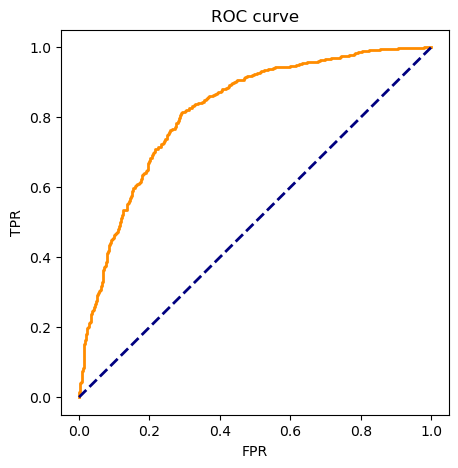

In [30]:
roc_auc_score(valid_y, lgbmc.predict_proba(valid_X_p)[:,1])

fpr, tpr, _ = roc_curve(valid_y, lgbmc.predict_proba(valid_X_p)[:,1])
plt.figure(figsize=[5, 5])
lw = 2

#plt.clf()
plt.plot(fpr, tpr,color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [31]:
classificationSummary(train_y, lgbmc.predict(train_X_p))

classificationSummary(valid_y, lgbmc.predict(valid_X_p))
print(classification_report(valid_y, lgbmc.predict(valid_X_p)))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 1837    0
     1    0 2291
Confusion Matrix (Accuracy 0.7610)

       Prediction
Actual   0   1
     0 563 254
     1 169 784
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       817
           1       0.76      0.82      0.79       953

    accuracy                           0.76      1770
   macro avg       0.76      0.76      0.76      1770
weighted avg       0.76      0.76      0.76      1770



<AxesSubplot: >

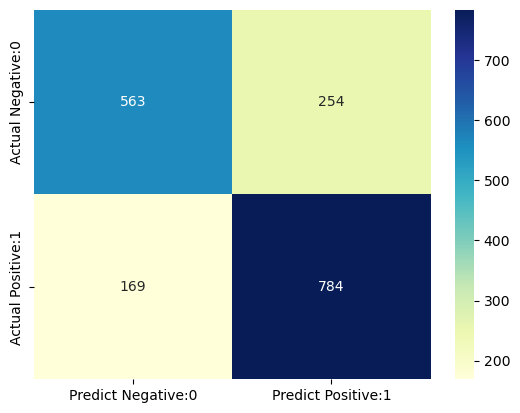

In [32]:
cm = confusion_matrix(valid_y, lgbmc.predict(valid_X_p))
cm_matrix = pd.DataFrame(data=cm, columns= ['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [34]:
feature_selector = SelectFromModel(lgbmc, threshold='median', prefit=True)
selected_train_X = feature_selector.transform(train_X_p)
selected_valid_X = feature_selector.transform(valid_X_p)
lgbmc_selected = LGBMClassifier(random_state=1, n_estimators=500, learning_rate=0.05, subsample=0.7)
lgbmc_selected.fit(selected_train_X, train_y)
selected_y_pred = lgbmc_selected.predict(selected_valid_X)
selected_accuracy = accuracy_score(valid_y, selected_y_pred)
print("Accuracy score with feature selection: {:.2f}%".format(selected_accuracy * 100))

Accuracy score with feature selection: 75.31%


In [33]:
threshold_2 = np.sort(lgbmc.feature_importances_)[3000:]
for thresh in threshold_2:
    # select features using threshold
    selection = SelectFromModel(lgbmc, threshold=thresh, prefit=True)
    select_X_train = selection.transform(train_X_p)
    # train model
    selection_model = LGBMClassifier()
    selection_model.fit(select_X_train, train_y)
    # eval model
    select_X_test = selection.transform(valid_X_p)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(valid_y, predictions)
    print("Thresh=%.3f, n=%d, accuracy score: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=11.000, n=317, accuracy score: 73.45%
Thresh=11.000, n=317, accuracy score: 73.45%
Thresh=11.000, n=317, accuracy score: 73.45%
Thresh=11.000, n=317, accuracy score: 73.45%
Thresh=11.000, n=317, accuracy score: 73.45%
Thresh=11.000, n=317, accuracy score: 73.45%
Thresh=11.000, n=317, accuracy score: 73.45%
Thresh=11.000, n=317, accuracy score: 73.45%
Thresh=11.000, n=317, accuracy score: 73.45%
Thresh=11.000, n=317, accuracy score: 73.45%
Thresh=11.000, n=317, accuracy score: 73.45%
Thresh=11.000, n=317, accuracy score: 73.45%
Thresh=11.000, n=317, accuracy score: 73.45%
Thresh=11.000, n=317, accuracy score: 73.45%
Thresh=11.000, n=317, accuracy score: 73.45%
Thresh=12.000, n=261, accuracy score: 74.24%
Thresh=12.000, n=261, accuracy score: 74.24%
Thresh=12.000, n=261, accuracy score: 74.24%
Thresh=12.000, n=261, accuracy score: 74.24%
Thresh=12.000, n=261, accuracy score: 74.24%
Thresh=12.000, n=261, accuracy score: 74.24%
Thresh=12.000, n=261, accuracy score: 74.24%
Thresh=12.

Thresh=18.000, n=101, accuracy score: 72.71%
Thresh=18.000, n=101, accuracy score: 72.71%
Thresh=18.000, n=101, accuracy score: 72.71%
Thresh=18.000, n=101, accuracy score: 72.71%
Thresh=19.000, n=89, accuracy score: 71.98%
Thresh=19.000, n=89, accuracy score: 71.98%
Thresh=19.000, n=89, accuracy score: 71.98%
Thresh=19.000, n=89, accuracy score: 71.98%
Thresh=19.000, n=89, accuracy score: 71.98%
Thresh=19.000, n=89, accuracy score: 71.98%
Thresh=19.000, n=89, accuracy score: 71.98%
Thresh=19.000, n=89, accuracy score: 71.98%
Thresh=19.000, n=89, accuracy score: 71.98%
Thresh=19.000, n=89, accuracy score: 71.98%
Thresh=19.000, n=89, accuracy score: 71.98%
Thresh=19.000, n=89, accuracy score: 71.98%
Thresh=20.000, n=77, accuracy score: 72.54%
Thresh=20.000, n=77, accuracy score: 72.54%
Thresh=20.000, n=77, accuracy score: 72.54%
Thresh=20.000, n=77, accuracy score: 72.54%
Thresh=20.000, n=77, accuracy score: 72.54%
Thresh=20.000, n=77, accuracy score: 72.54%
Thresh=20.000, n=77, accurac